In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pipe = pd.read_csv('C:/Python27/output_improved.csv')[['Listing ID','Review ID','Feature: Accuracy','Feature: Check-in','Feature: Cleanliness','Feature: Communication','Feature: Location','Feature: Value']]

In [16]:
pipe[:10]

,Listing ID,Review ID,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
0,2016324,43983275,0.0,0.000000,0.0,0.0,0.761395,0.0
1,2016324,43983275,0.0,0.273213,0.0,0.0,0.000000,0.0
2,2016324,43983275,0.0,0.000000,0.0,0.0,0.835976,0.0
3,2016324,43983275,0.0,0.000000,0.0,0.0,0.000000,0.0
4,2016324,43983275,0.0,0.000000,0.0,0.0,0.000000,0.0
5,2016324,43983275,0.0,0.000000,0.0,0.0,0.000000,0.0
6,2016324,43983275,0.0,0.000000,0.0,0.0,0.000000,0.0
7,2016430,12043319,0.0,0.000000,0.0,0.0,0.000000,0.0
8,2016430,12043319,0.0,0.000000,0.0,0.0,0.000000,0.0
9,2016430,12043319,0.0,0.000000,0.0,0.0,0.000000,0.0


In [128]:
ten=pipe.groupby('Listing ID')

In [129]:
# Rank listings according to the number of reviews
# We see that max nr of reviews = 275 and min=1 
# Not solved anymore

b=ten['Review ID'].value_counts()
b

Listing ID  Review ID
2818        20503978     31
            20302184     28
            16263344     17
            214718       14
            25881134     14
            48766        11
            260298       11
            1475433      11
            20096728     11
            33353330     11
            62552        10
            53269669     10
            31154         9
            94243         9
            97728         9
            105516        9
            194298        9
            196836        9
            341388        9
            510827        9
            1194128       9
            1872771       9
            20832438      9
            46271841      9
            47034916      9
            1989          8
            369637        8
            1191          7
            58048         7
            73222         7
                         ..
3986654     27062632      7
            19255559      4
            29254899      4
3990045     32403969      

In [137]:
total=ten['Review ID'].mean().count()
total

2334

In [127]:
# Rank listings according to the number of reviews
# We see that max nr of reviews = 275 and min=1
b=ten['Listing ID'].value_counts()
b.mean()

102.32519280205655

In [25]:
# Average number of reviews is 20. Get the average and round it to the closest integer

b.mean().round(0)

20.0

In [53]:
# We calculate the compound sentiment of the features for each listing. We use the condition 'is different from 0'
# because we use value 0 when the feature is not mentioned and we dont want the pipeline to be confused as sentiment.
# For features that are not mentioned at all for the listing a value NaN will appear

acc1=pipe[pipe['Feature: Accuracy']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Accuracy']]
acc=acc1.groupby('Listing ID').mean()

chec1=pipe[pipe['Feature: Check-in']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Check-inFeature: Check-in']]
chec=chec1.groupby('Listing ID').mean()

cle1=pipe[pipe['Feature: Cleanliness']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Cleanliness']]
cle=cle1.groupby('Listing ID').mean()

com1=pipe[pipe['Feature: Communication']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Communication']]
com=com1.groupby('Listing ID').mean()

loc1=pipe[pipe['Feature: Location']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Location']]
loc=loc1.groupby('Listing ID').mean()

val1=pipe[pipe['Feature: Value']!=0].groupby('Review ID').mean()[['Listing ID','Feature: Value']]
val=val1.groupby('Listing ID').mean()

frames=[acc,chec,cle,com,loc,val]
result=pd.concat(frames,axis=1)
result[:10]

,Feature: Accuracy,Feature: Check-in,Feature: Cleanliness,Feature: Communication,Feature: Location,Feature: Value
Listing ID,,,,,,
2818,0.393159,0.275906,0.499541,0.475244,0.433244,0.415081
3209,0.306186,NaN,0.925092,0.868943,0.448174,0.180579
20168,0.458665,0.271084,0.494754,0.344864,0.498637,0.430184
20818,NaN,0.220217,NaN,NaN,0.668266,NaN
23651,0.527225,0.565900,0.597617,0.581183,0.550549,0.528197
25488,0.535258,0.189464,0.607418,0.529348,0.489270,0.508477
25489,0.379591,0.341968,0.498873,0.474924,0.598680,0.440577
27886,0.306186,0.636027,0.869292,0.615501,0.685502,0.566686
28658,0.399496,0.289242,0.544151,0.489932,0.461225,0.460307


In [69]:
hmm=pipe['Listing ID'].value_counts().sum

In [148]:
# Calculation for finding out which feature is most mentioned in the reviews of the listing.
# From the total listing we substract the number of listings where the feature is not mentioned at all in the reviews 

a=total-result['Feature: Accuracy'].isnull().sum()
b=total-result['Feature: Check-in'].isnull().sum()
c=total-result['Feature: Cleanliness'].isnull().sum()
d=total-result['Feature: Communication'].isnull().sum()
e=total-result['Feature: Location'].isnull().sum()
f=total-result['Feature: Value'].isnull().sum()
#print 'Accuracy Check-in Cleanliness Communication Location Value'
#print a,b,c,d,e,f
df = [{'Nr of listings mentioned' : a, 'Percentage' : (a/total).round(2)},
      { 'Nr of listings mentioned': b, 'Percentage':(b/total).round(2)},
      { 'Nr of listings mentioned' : c, 'Percentage':(c/total).round(2)},
      { 'Nr of listings mentioned' : d, 'Percentage':(d/total).round(2)},
      { 'Nr of listings mentioned':e, 'Percentage':(e/total).round(2)},
      {'Nr of listings mentioned': f, 'Percentage':(f/total).round(2)}]
final=pd.DataFrame(df, index=['Accuracy', 'Check-in','Cleanliness','Communication','Location','Value'])
final

,Nr of listings mentioned,Percentage
Accuracy,1689,0.72
Check-in,1516,0.65
Cleanliness,1982,0.85
Communication,1970,0.84
Location,2298,0.98
Value,2081,0.89


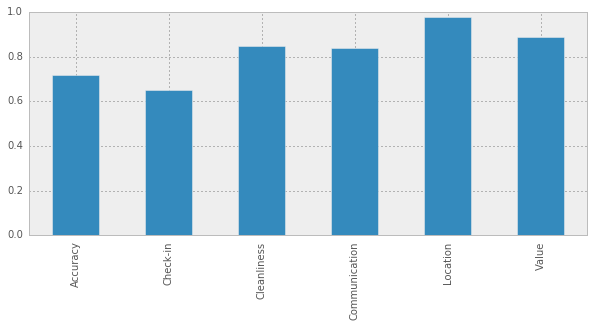

In [159]:
# Visualization of which feature is most mentioned in the listings

final['Percentage'].plot(kind='bar',figsize=(10, 4))

In [160]:
# Get the table with the compound sentiment scores for listings in a csv file

result.to_csv(path_or_buf='C:/Python27/Features_sentiment.csv')

In [172]:
airbnb= pd.read_csv('C:/Python27/AirbnbRating.csv')[:10]
airbnb[['Id','Accuracy','Check-in','Cleanliness','Communication','Location','Value']].dropna().to_csv(path_or_buf='C:/Python27/Features_airbnb.csv')